In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [3]:
rr_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0


## Ride Summary

In [4]:
def overallSummary(dataframe):
    print("Overall Distance Travelled:",dataframe['distance'].sum(),"KM")
    print("Average Speed:", dataframe['speed'].mean(),"KM/H")
    print("Average Cadence:", dataframe['cadence'].mean(),"RPM")
    print("Average Heart Rate:", dataframe['hr'].mean())
    print("Average Elevation Gained:",dataframe['elevation_gain'].mean(),"M")

print("\033[1mRoad Race 2016\033[0m")
overallSummary(rr_2016)
print("\n")
print("\033[1mRoad Race 2019\033[0m")
overallSummary(rr_2019)
print("\n")
print("\033[1mTime Trial 2016\033[0m")
overallSummary(tt_2016)
print("\n")
print("\033[1mTime Trial 2019\033[0m")
overallSummary(tt_2019)

Road Race 2016
Overall Distance Travelled: 49.04858574628638 KM
Average Speed: 34.93308475482947 KM/H
Average Cadence: 65.98795180722891 RPM
Average Heart Rate: 158.39440113394755
Average Elevation Gained: -0.003756201275690997 M


Road Race 2019
Overall Distance Travelled: 51.78913253596059 KM
Average Speed: 33.87986137188044 KM/H
Average Cadence: 70.0049064146829 RPM
Average Heart Rate: 138.99854624750137
Average Elevation Gained: 0.0002544066872614948 M


Time Trial 2016
Overall Distance Travelled: 24.80288703130808 KM
Average Speed: 33.52996304869014 KM/H
Average Cadence: 83.27709279688514 RPM
Average Heart Rate: 170.93964957819597
Average Elevation Gained: -0.002465931213497727 M


Time Trial 2019
Overall Distance Travelled: 24.38014504376575 KM
Average Speed: 33.05782378815691 KM/H
Average Cadence: 89.97966101694915 RPM
Average Heart Rate: 152.74124293785312
Average Elevation Gained: 0.0003766478342749529 M


As expected the overall distance travelled is consistent with 2 laps for Road Races and 1 lap for Time Trials. The average cadence is significantly higher for Time Trials. The Average Speed is relatively consistent across all 4 races.

## Speed Summary

In [5]:
def speedSummary(dataframe):
    print('Average Speed:',dataframe['speed'].mean())
    print('Max Speed:',dataframe['speed'].max())
    print('Standard Deviation:',dataframe['speed'].std())
    print('Median Speed:',dataframe['speed'].median())

print("\033[1mRoad Race 2016\033[0m")
speedSummary(rr_2016)
print("\n")
print("\033[1mRoad Race 2019\033[0m")
speedSummary(rr_2019)
print("\n")
print("\033[1mTime Trial 2016\033[0m")
speedSummary(tt_2016)
print("\n")
print("\033[1mTime Trial 2019\033[0m")
speedSummary(tt_2019)

Road Race 2016
Average Speed: 34.93308475482947
Max Speed: 92.74903649913952
Standard Deviation: 10.738676724095608
Median Speed: 33.307339470155554


Road Race 2019
Average Speed: 33.87986137188044
Max Speed: 70.37046868335639
Standard Deviation: 8.853502991978914
Median Speed: 33.04135976384563


Time Trial 2016
Average Speed: 33.52996304869014
Max Speed: 162.50576377606754
Standard Deviation: 11.519680824236476
Median Speed: 32.8400758641767


Time Trial 2019
Average Speed: 33.05782378815691
Max Speed: 63.300734121945005
Standard Deviation: 9.773521681835703
Median Speed: 33.22010754422876


It can be seen that Road Races have an average speed higher than that of Time Trial's, it is also important to note that the range of speeds as measured by standard deviation is much also lower for Road Races compared to their equivalent Time Trial indicating a better overall performance in terms of speed.

## Time Trial Comparison

In [6]:
print("\033[1mTime Trial 2016\033[0m")
speedSummary(tt_2016)
print("\n")
print("\033[1mTime Trial 2019\033[0m")
speedSummary(tt_2019)

Time Trial 2016
Average Speed: 33.52996304869014
Max Speed: 162.50576377606754
Standard Deviation: 11.519680824236476
Median Speed: 32.8400758641767


Time Trial 2019
Average Speed: 33.05782378815691
Max Speed: 63.300734121945005
Standard Deviation: 9.773521681835703
Median Speed: 33.22010754422876


In [7]:
#2016 Cumulative Distance
Dist_tt_2016 = tt_2016
Dist_tt_2016['cumulativeDist'] = tt_2016['distance'].cumsum(axis = 0, skipna = True)

#2019 Cumulative Distance
Dist_tt_2019 = tt_2019
Dist_tt_2019['cumulativeDist'] = tt_2019['distance'].cumsum(axis = 0, skipna = True)


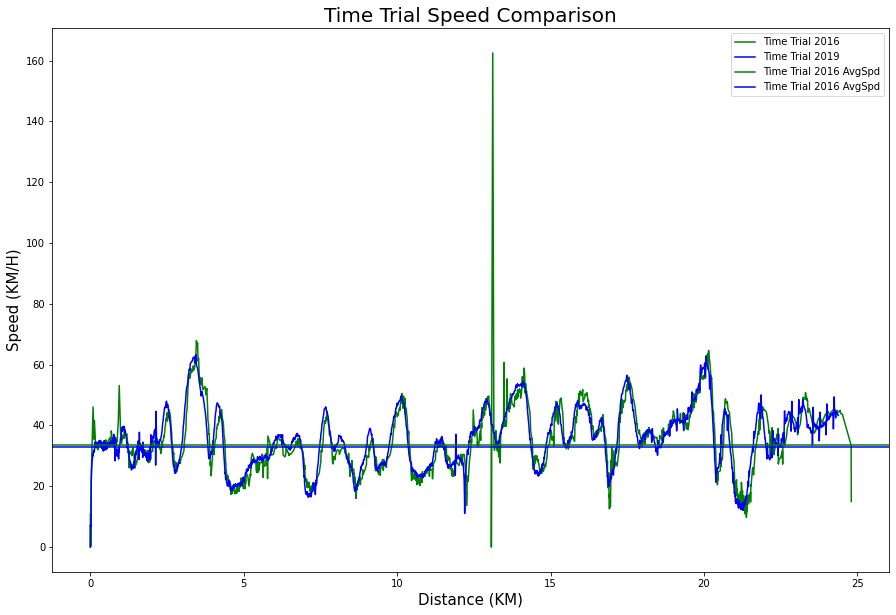

(<matplotlib.legend.Legend at 0x1d4adb98970>, None)

In [8]:
#Comparative Line Graph
plt.figure(figsize=(15, 10))
plt.plot(Dist_tt_2016['cumulativeDist'],Dist_tt_2016['speed'],color='g',label = "Time Trial 2016")
plt.plot(Dist_tt_2019['cumulativeDist'],Dist_tt_2019['speed'],color='b',label = "Time Trial 2019")

#Mean Lines
plt.axhline(y=Dist_tt_2016['speed'].mean(), color='g', linestyle='-', label = "Time Trial 2016 AvgSpd" )
plt.axhline(y=Dist_tt_2019['speed'].mean(), color='b', linestyle='-', label = "Time Trial 2016 AvgSpd" )

#Plot Settings
plt.title("Time Trial Speed Comparison", size = 20),plt.xlabel("Distance (KM)", size =15),plt.ylabel("Speed (KM/H)", size = 15)
plt.legend(),plt.show()

Time Trial 2016 has a higher average speed than Time Trial 2019 albeit a marginal difference. It also seems as though Time Trial 2016 has a larger range of speeds based on the standard deviation however referring to the line graph this may be explained by a spike in speed potentially indicating an outlier. 

Overall the speeds in both races mirror each other for the majority of the ride only significantly deviating in certain parts of the race. At around 0km it can be seen that 2016 had a signficantly better start and around 14km 2016 had a significantly better series of speeds, as the race continues 2016 had more peaks higher than that of 2019 further supporting the average speed being higher in 2016 indicating a better performance.

## Elevation Summary 

In [9]:
#Elevation Comparisons
def elevationSummary(flat,desc,climb):
    print('Flat Average Speed:', flat['speed'].mean());
    print('Descending Average Speed:', desc['speed'].mean())
    print('Climbing Average Speed:', climb['speed'].mean())
    print("\n")

#combining multiple data sets
complete_rr = rr_2016.append(rr_2019)
complete_tt = tt_2016.append(tt_2019)
complete_rrtt = complete_rr.append(complete_tt)

#splitting data into climbing, descending and flat
rr_flat = complete_rr[complete_rr['elevation_gain']== 0]
rr_desc = complete_rr[complete_rr['elevation_gain']< 0]
rr_climb = complete_rr[complete_rr['elevation_gain']> 0]

tt_flat = complete_tt[complete_tt['elevation_gain']== 0]
tt_desc = complete_tt[complete_tt['elevation_gain']< 0]
tt_climb = complete_tt[complete_tt['elevation_gain']> 0]

rrtt_flat = complete_rrtt[complete_rrtt['elevation_gain']== 0]
rrtt_desc = complete_rrtt[complete_rrtt['elevation_gain']< 0]
rrtt_climb = complete_rrtt[complete_rrtt['elevation_gain']> 0]

print("\033[1mRoad Race:\033[0m")
elevationSummary(rr_flat,rr_desc,rr_climb)
print("\033[1mTime Trial:\033[0m")
elevationSummary(tt_flat,tt_desc,tt_climb)
print("\033[1mCombined:\033[0m")
elevationSummary(rrtt_flat,rrtt_desc,rrtt_climb)

Road Race:
Flat Average Speed: 33.77837353249151
Descending Average Speed: 42.83221183541782
Climbing Average Speed: 28.02402549465135


Time Trial:
Flat Average Speed: 33.65635993489698
Descending Average Speed: 43.48006326266885
Climbing Average Speed: 25.50708968328126


Combined:
Flat Average Speed: 33.73507137738078
Descending Average Speed: 43.04120151302423
Climbing Average Speed: 27.189048124187323




In [10]:
#Plot Data
RoadRace = {"Flat":rr_flat['speed'].mean(), "Desc":rr_desc['speed'].mean(), "Climb":rr_climb['speed'].mean()}
TimeTrial ={"Flat":tt_flat['speed'].mean(), "Desc":tt_desc['speed'].mean(), "Climb":tt_climb['speed'].mean()} 
Combined ={"Flat":rrtt_flat['speed'].mean(), "Desc":rrtt_desc['speed'].mean(), "Climb":rrtt_climb['speed'].mean()} 
ElevationDF = pd.DataFrame([RoadRace,TimeTrial,Combined], index=['RoadRace','TimeTrial','Combined']).transpose()

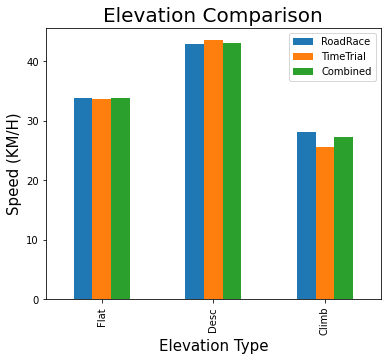

In [11]:
#Plot
fig, ax= plt.subplots(1,1, figsize=(6,5))
ElevationDF.plot.bar(ax=ax)
plt.title("Elevation Comparison", size = 20),plt.xlabel("Elevation Type", size =15),plt.ylabel("Speed (KM/H)", size = 15)
plt.show()

As consistent with conventional knowledge the average speeds are fastest when Descending followed by flat ground and finally slowest when climbing. There is little different between Road Races and Time Trials hte majority of differences being marginal at best. Speed distribution across the three elevations is relatively consistent across race types.

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





## Data Preparation

In [12]:
# Development Calculation
rr_2016['Development'] =(((rr_2016['speed']*1000)/60)/rr_2016['cadence'])
rr_2019['Development'] =(((rr_2019['speed']*1000)/60)/rr_2019['cadence'])
tt_2016['Development'] =(((tt_2016['speed']*1000)/60)/tt_2016['cadence'])
tt_2019['Development'] =(((tt_2019['speed']*1000)/60)/tt_2019['cadence'])
#Cadence Data Cleaning
rr_2016 = rr_2016[rr_2016['cadence']>0]
rr_2019 = rr_2019[rr_2019['cadence']>0]
tt_2016 = tt_2016[tt_2016['cadence']>0]
tt_2019 = tt_2019[tt_2019['cadence']>0]

In [13]:
# Development Data cleaning
rr_2016 = rr_2016[rr_2016['Development']<10]
rr_2016 = rr_2016[rr_2016['Development']>2]

rr_2019 = rr_2019[rr_2019['Development']<10]
rr_2019 = rr_2019[rr_2019['Development']>2]

tt_2016 = tt_2016[tt_2016['Development']<10]
tt_2016 = tt_2016[tt_2016['Development']>2]

tt_2019 = tt_2019[tt_2019['Development']<10]
tt_2019 = tt_2019[tt_2019['Development']>2]

In [14]:
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,cumulativeDist,Development
2019-06-01 22:55:05+00:00,-33.415641,151.221965,219.4,13.0,135.0,21.0,94.0,0.001909,0.0,6.871585,1.0,0.019567,5.453639
2019-06-01 22:55:06+00:00,-33.415625,151.221956,219.4,13.0,522.0,53.0,96.0,0.001965,0.0,7.075658,1.0,0.021532,2.225050
2019-06-01 22:55:07+00:00,-33.415575,151.221929,219.4,13.0,500.0,67.0,97.0,0.006098,0.0,21.954313,1.0,0.027631,5.461272
2019-06-01 22:55:08+00:00,-33.415522,151.221900,219.4,13.0,493.0,74.0,99.0,0.006479,0.0,23.324036,1.0,0.034110,5.253161
2019-06-01 22:55:09+00:00,-33.415464,151.221867,219.4,13.0,477.0,80.0,101.0,0.007140,0.0,25.702772,1.0,0.041249,5.354744


## Data Visualisation

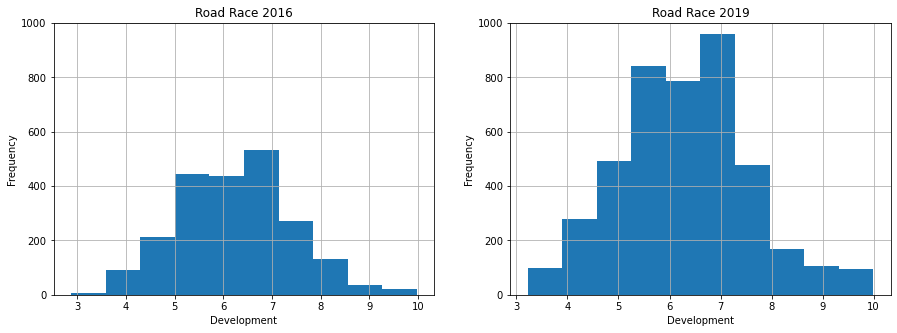

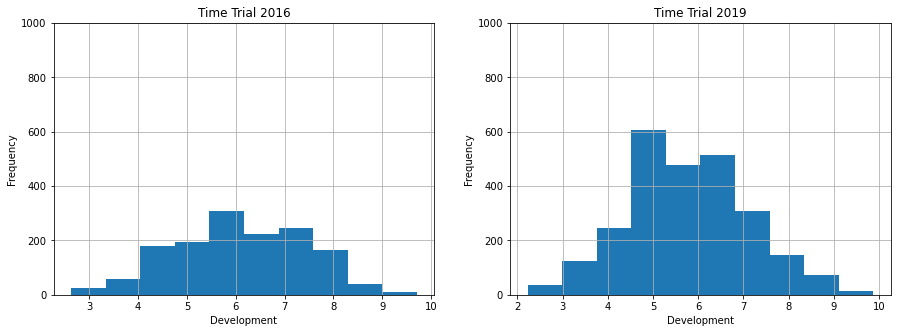

In [15]:
#Road Race
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
rr_2016['Development'].hist(ax = ax1)
rr_2019['Development'].hist(ax = ax2)
ax1.set_xlabel('Development'),ax1.set_ylabel('Frequency'),ax1.title.set_text("Road Race 2016")
ax2.set_xlabel('Development'),ax2.set_ylabel('Frequency'),ax2.title.set_text("Road Race 2019")
ax1.set_ylim([0, 1000]),ax2.set_ylim([0, 1000])
plt.show()


#Time Trial
fig, (ax3,ax4) = plt.subplots(1,2, figsize=(15,5),)
tt_2016['Development'].hist(ax = ax3)
tt_2019['Development'].hist(ax = ax4)
ax3.set_xlabel('Development'),ax3.set_ylabel('Frequency'),ax3.title.set_text("Time Trial 2016")
ax4.set_xlabel('Development'),ax4.set_ylabel('Frequency'),ax4.title.set_text("Time Trial 2019")
ax3.set_ylim([0, 1000]),ax4.set_ylim([0, 1000])
plt.show()


based on the histograms, the development across a race seems to lean towards a normal distribution regardless of race type with the majority the race between around a development of 5 to 7. There seems to be little differences between the distribution of Development in both Road Race's and Time Trial 2019 however Time Trial 2016 is significantly flatter which may be a result of the data cleaning process ie Time Trial 2016 may have had more abnormal data removed than the other datasets.